### Softmax 回归(分类问题)

1. 快捷键: 对cell 按 m
2. 与LR不同在于, 输出层的个数 不是1, 而是类别的个数
3. 为什么使用softmax?
    - 是因为直接使用输出层有两个问题:
        - 输出值的范围不稳定, 难以从直观上判断意义
        - 真实标签是散列值, 输出值与离散值很难计算误差
    - softmax 将输出值 变换成值为正且和为1的概率分布
4. why not 平方损失函数:
    - 不需要预测概率 完全 等于 标签概率
    - 只需要 最大预测值 对应正确的标签
5. why 交叉熵损失函数:
    - 更适合衡量两个概率分布
    - 关心对正确类别的预测概率，因为只要其值足够大，就可以确保分类结果正确
6. 为什么有负号: H = -log (y_hat[i])
    - 因为预测概率都小于1, 大于0, 取对数是负数
7. 为了表达 样本预测各个输出的概率, softmax 运算会先通过exp函数对每个元素做指数算, 然后 每个元素再除以各自行的和
8. Softmax 公式: 用exp函数对预测概率进行归一化  $$ P(y=j|\theta(j)) = \frac{e^{\theta(j)}}{\sum_{j=1}^{k}e{_k^{\theta(j)}}} $$

### 交叉熵损失函数
0. k 表示 k元分类问题中的k
1. 转换真实标签: 对于样本x, 标签为y, 构造向量Y: shape是1* k, 第y个元素是1, 其余元素都是0
2. 平方损失函数不适用的原因: 为了预测分类结果正确, 不需要预测Y完全等于标签, 只要预测向量Y中的第y个元素最大, 所以平方损失函数过于严格
3. 更适合衡量两个概率分布差异的测量函数: 交叉熵损失函数: $$ H(y{^{(i)}, y{^{'(i)}}}) = - \sum_{j=1}^{k} y{_j^{(i)}}log(y{_j^{'(i)})} $$
4. 因为只有一个是1, 其余是0, 所以 H()只和 预测为1 的类别有关
5. 损失函数: y[i] 是向量  $$ l(\theta) = \frac{1}{n} \sum_{i=1}^{n}H(y^{(i)}, y^{'(i)})$$
所以, n为样本数, y_j 是指第i个类别: $$ l(\theta) = -\frac{1}{n} \sum_{i=1}^{n} log(y{_{y^j}^{(i)}}) $$

## 贝叶斯公式
- 贝叶斯公式: 多大把握能相信一件证据？how much you can trust the evidence
- e.g: A代表吃苹果(Apple)事件, B代表吃牛肉(Beef)事件
    - P(A|B): 先牛肉后苹果的概率
    - P(B|A): 先苹果后牛肉的概率
    - ~A: 不吃苹果的事件
    - 公式一: $$ P(A|B)= \frac {P(B|A) P(A)} {P(B)} $$, 解释: 先牛肉后苹果的概率, 等于 吃了苹果也吃了牛肉的事件概率, 除以 吃牛肉事件的概率
    - 公式二: $$ P(A|B) P(B) = P(B|A) P(A) $$, 解释: 左边是 吃了牛肉且吃了苹果的概率, 右边是吃了苹果且吃了牛肉的概率, 因为A和B是独立同分布事件, 所以二者相等, 且都表示 吃了牛肉和苹果的事件
    - 公式三: $$ P(A|B) = \frac {P(B|A) P(A)} {P(B|A) P(A) + P(B|~A) P(~A)} $$, 解释: P(B|A) * P(A)表示先苹果后牛肉的概率, P(B|\~A) * P(\~A)表示在吃牛肉之前 吃了除苹果以外的东西的概率, 所以, 如果要想在吃牛肉和吃苹果之间有必然的联系, 那么就需要除了苹果, 什么都不用吃, 也就是 P(\~A) 为 0

### 极大似然估计(MLE, Maximum Likelihood Estimation)
- definition: 利用已知的样本数据信息, 反推 最大概率导致 样本结果的参数值
- 给定观察数据, 评估模型参数
- 概率统计, 概率 is not equal to 统计:
    - 概率: 
        - given: 模型, 参数
        - result: 模型结果的特性
    - 统计:
        - given: 数据
        - result: predicted 模型和参数
    - in summary: 概率是已知模型和参数，推数据。统计是已知数据，推模型和参数
- 似然函数 vs 概率函数:
    - 对于, x 是 数据, θ 是 模型参数 $$ P(x|\theta) $$
    - x已知, θ是变量: 似然函数
    - θ已知, x是变量: 概率函数
- 极大似然估计: 最大化似然函数, 即: 求参数θ(事件发生的概率), 使似然函数P(x|θ)最大  -> 对P(x|θ)关于θ求导
- reference:
    - 这个摸球的例子好: https://zhuanlan.zhihu.com/p/26614750
    - https://blog.csdn.net/u011508640/article/details/72815981
    - https://zhuanlan.zhihu.com/p/26614750

### 最大后验概率估计(MAP, Maximum A Posteriori Estimation)
- 通过极大似然估计得到的参数θ, 未考虑到先验概率, 所以结果存疑, 这时, 就有 最大后验概率估计
- 求参数θ, 使P(x|θ)P(θ)最大, P(θ) 是先验概率
- 本质是最大化 P(θ|x), 即<b>后验概率</b>, 公式: $$ P(θ|x) = \frac{P(x|\theta)P(\theta)}{P(x)} $$
- 在一个给定数据集中, P(x)已知.
- 区别先验概率和后验概率: 
    - 先验概率: P(θ), P(x)
    - 后验概率: P(θ|x), 已知x, 求θ的概率

### 伯努利分布
伯努利分布(0-1分布, 两点分布)公式: 事件成功的概率为p, 失败概率为q=(1-p)
$$ f(x) = p^x (1-p)^{1-x} = p^x q^{1-x}$$
if x = 1:
    $$ f(x) = p $$
if x = 0:
    $$ f(x) = 1-p $$
期望值: $$ E(X) = \sum_{i=0}^{1}x_i f(x) = 0 + p = p $$
方差: $$ var(X) = \sum_{i=0}^{1}(x_i - E(X))^2f(x) = pq $$
标准差: $$ std(X) = \sqrt{pq} $$

In [1]:
import sys
from mxnet import nd, autograd, gluon

In [2]:
# 预处理数据

def get_dataloader_workers(num_workers=4):
    # 0 means no additional process is used to speed up the reading of data.
    if sys.platform.startswith('win'):
        return 0
    else:
        return num_workers
    
    
def load_data_fashion_mnist(batch_size, resize=None):
    """Download the Fashion-MNIST dataset and then load into memory."""
    dataset = gluon.data.vision
    trans = [dataset.transforms.Resize(resize)] if resize else []
    trans.append(dataset.transforms.ToTensor())
    trans = dataset.transforms.Compose(trans)
    mnist_train = dataset.FashionMNIST(train=True).transform_first(trans)
    mnist_test = dataset.FashionMNIST(train=False).transform_first(trans)
    return (gluon.data.DataLoader(mnist_train, batch_size, shuffle=True,
                                  num_workers=get_dataloader_workers()),
            gluon.data.DataLoader(mnist_test, batch_size, shuffle=False,
                                  num_workers=get_dataloader_workers()))

In [3]:
# 读取数据
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [4]:
print(len(train_iter), len(test_iter))

235 40


In [5]:
# 初始化模型参数
num_inputs = 28 * 28
num_outputs = 10

W = nd.random.normal(scale=0.01, shape=(num_inputs, num_outputs))
b = nd.zeros(num_outputs)
# 分配梯度
W.attach_grad()
b.attach_grad()

In [6]:
# 有没有keepdims, 有何区别
X = nd.array([ [1,2,3], [4,5,6] ])
print(X.sum(axis=0), X.sum(axis=1))  # 一维向量
print(X.sum(axis=0, keepdims=True), X.sum(axis=1, keepdims=True))  # 二维向量


[5. 7. 9.]
<NDArray 3 @cpu(0)> 
[ 6. 15.]
<NDArray 2 @cpu(0)>

[[5. 7. 9.]]
<NDArray 1x3 @cpu(0)> 
[[ 6.]
 [15.]]
<NDArray 2x1 @cpu(0)>


In [67]:
def softmax(y):
    exp_y = y.exp()
    sum_exp_y = exp_y.sum(axis=1, keepdims=True)
    return exp_y / sum_exp_y

In [8]:
test_sm = nd.random.normal(shape=(2,5))
test_sm_prob = softmax(test_sm)
print(test_sm, test_sm_prob, test_sm_prob.sum(axis=1))


[[ 1.7974477   0.19594947 -1.7376399   0.04734707  0.14580931]
 [ 0.32604918  0.4578783  -0.8942581   0.49383944 -0.9043427 ]]
<NDArray 2x5 @cpu(0)> 
[[0.6264712  0.126293   0.01826552 0.10885343 0.12011679]
 [0.25569436 0.2917251  0.0754655  0.3024068  0.07470828]]
<NDArray 2x5 @cpu(0)> 
[0.99999994 1.        ]
<NDArray 2 @cpu(0)>


In [9]:
# 定义模型
# net = softmax(W*X + b)
def net(X):
    return softmax(nd.dot(X.reshape(-1, num_inputs), W) + b)

In [10]:
# 定义损失函数: 交叉熵损失函数
# def cross_entropy(y, y_hat):
#     """
#     y 与 y_hat 点乘, 只剩下一个prob
#     :param y: label
#     :param y_hat: prediction
#     """
#     m, k = y.shape  # m 为 样本数
#     only_one = (y * y_hat).sum(axis=0, keep_dims=True)
#     return only_one.sum(axis=1) / m
def cross_entropy(y_hat, y):
    """
    pick 函数, 根据 y 的值, 挑选中y_hat第k个元素
    这个挺方便的, 不需要one-hot
    """
    return - nd.pick(y_hat, y).log()

In [11]:
# 计算预测准确率
def accuracy(y_hat, y):
#     return (nd.argmax(y_hat) == y).sum()/y.shape[0]
    return (y_hat.argmax(axis=1) == y.astype('float32')).mean().asscalar()

In [12]:
# 评估模型
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        y = y.astype('float32')
        acc_sum += (net(X).argmax(axis=1) == y).sum().asscalar()
        n += y.size
    return acc_sum / n

In [13]:
# 训练模型
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size
        
        
def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params=None, lr=None, trainer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter:
            with autograd.record():
                y_hat = net(X)
                l = loss(y_hat, y).sum()
            l.backward()
            if trainer is None:
                sgd(params, lr, batch_size)
            else:
                trainer.step(batch_size)
            y = y.astype('float32')
            train_l_sum += l.asscalar()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().asscalar()
            n += y.size
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))

In [52]:
print(type(X), type(y))

<class 'mxnet.ndarray.ndarray.NDArray'> <class 'mxnet.ndarray.ndarray.NDArray'>


In [14]:
num_epochs, lr = 50, 0.1
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, 
          batch_size, [W, b], lr)

epoch 1, loss 0.7900, train acc 0.745, test acc 0.803
epoch 2, loss 0.5739, train acc 0.811, test acc 0.822
epoch 3, loss 0.5290, train acc 0.824, test acc 0.829
epoch 4, loss 0.5059, train acc 0.830, test acc 0.835
epoch 5, loss 0.4904, train acc 0.835, test acc 0.840
epoch 6, loss 0.4778, train acc 0.838, test acc 0.843
epoch 7, loss 0.4694, train acc 0.841, test acc 0.844
epoch 8, loss 0.4625, train acc 0.841, test acc 0.848
epoch 9, loss 0.4560, train acc 0.845, test acc 0.848
epoch 10, loss 0.4507, train acc 0.847, test acc 0.847
epoch 11, loss 0.4476, train acc 0.848, test acc 0.848
epoch 12, loss 0.4435, train acc 0.849, test acc 0.851
epoch 13, loss 0.4406, train acc 0.849, test acc 0.851
epoch 14, loss 0.4372, train acc 0.850, test acc 0.852
epoch 15, loss 0.4343, train acc 0.851, test acc 0.851
epoch 16, loss 0.4313, train acc 0.852, test acc 0.854
epoch 17, loss 0.4295, train acc 0.853, test acc 0.848
epoch 18, loss 0.4276, train acc 0.853, test acc 0.853
epoch 19, loss 0.42

In [15]:
evaluate_accuracy(test_iter, net)

0.857

In [16]:
for X, y in test_iter:
    break

In [17]:
X.reshape(-1, num_inputs).shape

(256, 784)

### 练习
1. 最大似然估计 和 最小化交叉熵损失函数 的异同
2. batch_size 对 DataLoader 的读取性能有无影响
3. 修改 num_workers 对读取性能有无影响
4. mxnet.gluon.data.vision 提供了哪些数据集
5. mxnet.gluon.data.vision.transforms 提供了哪些变换方法
6. 直接按照softmax运算的数学定义来实现 softmax()函数, 这可能会造成什么问题?
7. cross_entropy()函数是按照交叉熵损失函数的数学定义实现的, 这样的实现方式可能有什么问题?
8. 哪些办法能解决上面的两个问题?

解:
1. [最小化交叉熵损失与极大似然](https://zhuanlan.zhihu.com/p/51099880)  =
分类问题(一般分类问题，是指单标签多分类问题)的概率本质是计算类别变量的广义的伯努利分布.  
在伯努利分布下，极大似然估计与最小化交叉熵损失其实是同一回事
2. 有影响, 一个凹面函数
3. 有影响, 越大越好
4. 数据集:
    - CIFAR10
    - CIFAR100
    - FashionMNIST
    - ImageFolderDataset
    - ImageRecordDataset
    - MNIST
5. 变换类:
    - Block
    - Cast: 转换数据类型
    - CenterCrop
    - Compose: 串行组合拳, 用一个转换类实例的列表初始化
    - CropResize
    - HybridBlock
    - HybridSequential
    - Normalize: 归一化, 减去均值再除以标准差
    - RandomBrightness
    - RandomColorJitter
    - RandomContrast
    - RandomFlipLeftRight
    - RandomFlipTopBottom
    - RandomHue
    - RandomLighting
    - RandomResizedCrop
    - RandomSaturation
    - Resize: 将图片多维数组转为自定义维度, 需在ToTensor之前
    - Sequential
    - ToTensor: 将图片多维数组转为张量
6. 对数函数的值容易变得很大, e.g: exp(50)
    - [参考](https://discuss.gluon.ai/t/topic/741/172?u=zhibinjiang)
    - solution: X = X - X.max()
    
7. 对数的定义域是 大于0, 可以给 参数加上一个小数
8. 

In [18]:
import time
gdataset = gluon.data.vision
trans = [gdataset.transforms.ToTensor()]
trans = gdataset.transforms.Compose(trans)
mnist_train = gdataset.FashionMNIST(train=True).transform_first(trans)
mnist_test = gdataset.FashionMNIST(train=False).transform_first(trans)

In [19]:
# 不同 batch size
for bs_num in [1, 3, 10, 30, 100, 300]:
    concurrency = 4
    epoch_time = time.time()
    temp_data_loader = gluon.data.DataLoader(
        mnist_train, bs_num, shuffle=True, num_workers=concurrency)
    for temp_X, temp_y in temp_data_loader:
        X_shape = temp_X.shape
        y_shape = temp_y.shape
    print("Batch Size: {}, Costs: {}".format(
        bs_num, round(time.time() - epoch_time, 5)))

Batch Size: 1, Costs: 19.61233
Batch Size: 3, Costs: 7.34393
Batch Size: 10, Costs: 4.21562
Batch Size: 30, Costs: 2.54065
Batch Size: 100, Costs: 1.78112
Batch Size: 300, Costs: 1.72961


In [20]:
# 不同 num of workers
for diff_workers in [1, 2, 3, 4, 5, 6, 7, 8, None]:
    # None 为不传
    bs_num = 100
    epoch_time = time.time()
    if not diff_workers:  # 默认为0
        temp_data_loader = gluon.data.DataLoader(
            mnist_train, bs_num, shuffle=True)
    else:
        temp_data_loader = gluon.data.DataLoader(
            mnist_train, bs_num, shuffle=True, num_workers=diff_workers)
    for temp_X, temp_y in temp_data_loader:
        X_shape = temp_X.shape
        y_shape = temp_y.shape
    print("Workers Num: {}, Costs: {}".format(
        diff_workers, round(time.time() - epoch_time, 5)))

Workers Num: 1, Costs: 3.93413
Workers Num: 2, Costs: 2.26061
Workers Num: 3, Costs: 1.94657
Workers Num: 4, Costs: 2.01535
Workers Num: 5, Costs: 1.82173
Workers Num: 6, Costs: 1.83479
Workers Num: 7, Costs: 1.85191
Workers Num: 8, Costs: 1.96674
Workers Num: None, Costs: 3.41894


In [21]:
# 是否 shuffle
bs_num = 300
concurrency = 4
for is_shuffle in [True, False]:
    epoch_time = time.time()
    temp_data_loader = gluon.data.DataLoader(
        mnist_train, bs_num, shuffle=is_shuffle, num_workers=concurrency)
    for temp_X, temp_y in temp_data_loader:
        X_shape = temp_X.shape
        y_shape = temp_y.shape
    print("Is Shuffled: {}, Costs: {}".format(
        is_shuffle, round(time.time() - epoch_time, 5)))

Is Shuffled: True, Costs: 1.58832
Is Shuffled: False, Costs: 1.5375


In [23]:
# 可视化 图片集
from IPython import display
import matplotlib.pyplot as plt


def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]


def show_fashion_mnist(images, labels):
    display.set_matplotlib_formats('svg')  # 用grey 就不行
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)).asnumpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)

<class 'mxnet.ndarray.ndarray.NDArray'> <class 'numpy.ndarray'>


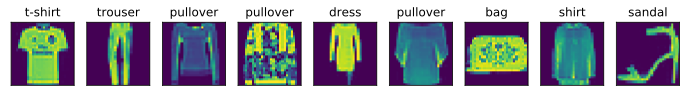

In [50]:
viz_X, viz_y = mnist_test[0:9]
# viz_y = nd.array(viz_y)
print(type(viz_X), type(viz_y))
show_fashion_mnist(viz_X, get_fashion_mnist_labels(viz_y))

In [45]:
viz_y.shape

(9,)

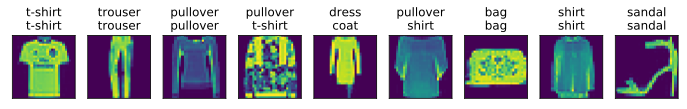

In [54]:
real_labels = get_fashion_mnist_labels(viz_y)
pred_labels = get_fashion_mnist_labels(net(viz_X).argmax(axis=1).asnumpy())
titles = [true + '\n' + pred for true, pred in zip(real_labels, pred_labels)]
show_fashion_mnist(viz_X, titles)

In [26]:
for DS in dir(gluon.data.vision):
    if not DS.startswith("_"):
        print(DS)

CIFAR10
CIFAR100
FashionMNIST
ImageFolderDataset
ImageRecordDataset
MNIST
datasets
transforms


In [32]:
for ts_method in dir(gluon.data.vision.transforms):
    if not ts_method.startswith("_"):
        print(ts_method)

Block
Cast
CenterCrop
Compose
CropResize
HybridBlock
HybridSequential
Normalize
RandomBrightness
RandomColorJitter
RandomContrast
RandomFlipLeftRight
RandomFlipTopBottom
RandomHue
RandomLighting
RandomResizedCrop
RandomSaturation
Resize
Sequential
ToTensor
image
numeric_types


In [94]:
# 第六题
def softmax_v2(X):
    X = X - X.max()  # 所有元素减去一个数字
    X_exp = X.exp()
    return X_exp / X_exp.sum(axis=1, keepdims=True)

In [85]:
test_sm_large = nd.random.normal(scale=50, shape=(2,5))

In [96]:
%time softmax_v2(test_sm_large)
print(test_sm_large)
%time softmax(test_sm_large)
print(softmax(test_sm_large))
print(softmax_v2(test_sm_large))

CPU times: user 884 µs, sys: 580 µs, total: 1.46 ms
Wall time: 774 µs

[[ 49.717594 -11.790297  14.940901 -99.91038   17.556772]
 [-38.22371   62.971764 -48.148678  25.40253   37.80867 ]]
<NDArray 2x5 @cpu(0)>
CPU times: user 499 µs, sys: 398 µs, total: 897 µs
Wall time: 524 µs

[[1.00000000e+00 1.93848527e-27 7.88268131e-16 0.00000000e+00
  1.07828234e-14]
 [1.12103877e-44 1.00000000e+00 0.00000000e+00 4.82935802e-17
  1.17979706e-11]]
<NDArray 2x5 @cpu(0)>

[[1.0000000e+00 1.9384812e-27 7.8826967e-16 0.0000000e+00 1.0782803e-14]
 [1.1210388e-44 1.0000000e+00 0.0000000e+00 4.8293583e-17 1.1797971e-11]]
<NDArray 2x5 @cpu(0)>


### Softmax with MXnet


In [97]:
from mxnet import gluon, init
from mxnet.gluon import loss as gloss, nn

In [99]:
# 定义和初始化模型
net = nn.Sequential()
net.add(nn.Dense(10))  # 指定输出层个数
net.initialize(init.Normal(sigma=0.01))

In [102]:
loss = gloss.SoftmaxCrossEntropyLoss()

In [103]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})

In [105]:
net.collect_params()

sequential1_ (
  Parameter dense1_weight (shape=(10, 0), dtype=float32)
  Parameter dense1_bias (shape=(10,), dtype=float32)
)

In [108]:
train_ch3(net, train_iter, test_iter, loss, num_eopchs, batch_size, trainer=trainer)

epoch 1, loss 0.7873, train acc 0.748, test acc 0.809
epoch 2, loss 0.5728, train acc 0.811, test acc 0.814
epoch 3, loss 0.5292, train acc 0.823, test acc 0.830
epoch 4, loss 0.5052, train acc 0.830, test acc 0.834
epoch 5, loss 0.4891, train acc 0.834, test acc 0.842
epoch 6, loss 0.4777, train acc 0.839, test acc 0.841
epoch 7, loss 0.4684, train acc 0.841, test acc 0.840
epoch 8, loss 0.4622, train acc 0.842, test acc 0.845
epoch 9, loss 0.4562, train acc 0.844, test acc 0.846
epoch 10, loss 0.4515, train acc 0.846, test acc 0.847
epoch 11, loss 0.4473, train acc 0.848, test acc 0.850
epoch 12, loss 0.4432, train acc 0.849, test acc 0.850
epoch 13, loss 0.4398, train acc 0.849, test acc 0.850
epoch 14, loss 0.4366, train acc 0.850, test acc 0.848
epoch 15, loss 0.4343, train acc 0.852, test acc 0.853
epoch 16, loss 0.4313, train acc 0.853, test acc 0.854
epoch 17, loss 0.4295, train acc 0.852, test acc 0.853
epoch 18, loss 0.4273, train acc 0.854, test acc 0.847
epoch 19, loss 0.42

### Final. 坑
1. MXnet都是类, mxnet的ndarray和numpy的ndarray共存
    - 在函数定义时, 写明输入类型和输出类型
    -  设定规则: 所有方法内部的ndarray都用mxnet的
2. Fashion MNIST 用svg可视化, 而MNIST用 gray
3. 求和时, 要注意 axis和 keepdims